로지스틱회귀는 대표적인 분류문제를 푸는 알고리즘
  - 주로 이진 분류 / 다중분류도 가능
  - 회귀알고리즘을 분류로 변경한것임 : 값을 연속적으로 예측  
  - 연속적인 값의 범위를 예측하는 것이 아니라 입력특성의 가중치의 합을 확률로 예측 이때 연속값을 확률로 변경하기위해서 시그모이드 함수 또는 로지스틱 함수
  - 확률은 0과 1사이다 : 값이 0.5이상이면 1, 그 이하면 0
  - 장점
    - 단순하고 해석하기 쉬운모델
  - 단점
    - 복잡한 패턴을 모델링하기에 적합하지 않음
    - 이상치나 잘못된 레이블에 민감할 수 있음

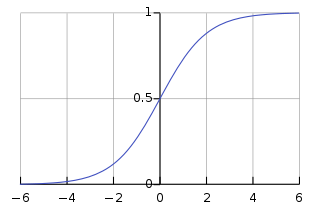

In [14]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung20231211/python/main/data/logistic_data.csv')
df.head()

,Target,Weight,Length,Diagonal,Height,Width
0,a,242.0,25.4,30.0,11.5200,4.0200
1,a,290.0,26.3,31.2,12.4800,4.3056
2,a,340.0,26.5,31.1,12.3778,4.6961
3,a,363.0,29.0,33.5,12.7300,4.4555
4,a,430.0,29.0,34.0,12.4440,5.1340


In [15]:
df.tail()

,Target,Weight,Length,Diagonal,Height,Width
154,g,12.2,12.2,13.4,2.0904,1.3936
155,g,13.4,12.4,13.5,2.4300,1.2690
156,g,12.2,13.0,13.8,2.2770,1.2558
157,g,19.7,14.3,15.2,2.8728,2.0672
158,g,19.9,15.0,16.2,2.9322,1.8792


In [17]:
df['Target'].value_counts()

e    56
a    35
b    20
f    17
g    14
d    11
c     6
Name: Target, dtype: int64

In [25]:
X = df.iloc[:,1:]
y = df['Target']

- 학습할때의 데이터모양이 나중에 예측할때도 동일한 모양이되어야 한다.
- 그래서 데이터프레임을 -> 넘파이형태로 변경

In [26]:
X_np = X.to_numpy()
X_np[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [28]:
y_np = y.to_numpy()
y_np[:5]

array(['a', 'a', 'a', 'a', 'a'], dtype=object)

학습용 테스트용 데이터로 섞고 분리한다.

In [30]:
from sklearn.preprocessing import StandardScaler
X_np_scaled = StandardScaler().fit_transform(X_np)

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test =  train_test_split(X_np_scaled, y_np,random_state=50,stratify=y_np)

k-최근접 이웃 알고리즘을 이용해서 분류모델 생성

In [53]:
from sklearn.neighbors import KNeighborsClassifier
# 객체생성
knc = KNeighborsClassifier()
# 학습
knc.fit(X_train, y_train)
# 평가 - 훈련데이터
print(knc.score(X_train, y_train))
# 평가 - 테스트데이터
print(knc.score(X_test, y_test))

0.8403361344537815
0.8


In [54]:
import numpy as np
np.unique(y_train,return_counts=True)

(array(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype=object),
 array([26, 15,  5,  8, 42, 13, 10]))

In [55]:
np.unique(y_test,return_counts=True)

(array(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype=object),
 array([ 9,  5,  1,  3, 14,  4,  4]))

In [56]:
knc.predict(X_test[:5])

array(['g', 'a', 'g', 'e', 'e'], dtype=object)

분류모델에서  why 테스트데이터를 a 또는 b 라고 분류(예측)할까?
  - 각 클래스에 대한 확률로 값을 표현 - proba

In [57]:
knc.predict_proba(X_test[:5])

array([[0. , 0.2, 0. , 0. , 0.2, 0. , 0.6],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0.2, 0. , 0. , 0.8, 0. , 0. ],
       [0. , 0.2, 0. , 0. , 0.8, 0. , 0. ]])

로지스틱회귀는 이진분류에 특화되어 있다
  - 기존 데이터중에 분류 두개를 뽑아서 적용

In [59]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung20231211/python/main/data/logistic_data.csv')
df['Target'].value_counts()

e    56
a    35
b    20
f    17
g    14
d    11
c     6
Name: Target, dtype: int64

In [ ]:
df[(df['Target'] == 'e') | (df['Target'] == 'a')]

In [65]:
# prompt: df[(df['Target'] == 'e') | (df['Target'] == 'a')]  간단하게 개선

logistic_df =  df[df['Target'].isin(['e','a'])]
logistic_df.head()

,Target,Weight,Length,Diagonal,Height,Width
0,a,242.0,25.4,30.0,11.5200,4.0200
1,a,290.0,26.3,31.2,12.4800,4.3056
2,a,340.0,26.5,31.1,12.3778,4.6961
3,a,363.0,29.0,33.5,12.7300,4.4555
4,a,430.0,29.0,34.0,12.4440,5.1340


In [66]:
# 로지스틱회귀
from sklearn.linear_model import LogisticRegression  # 분류모델

In [69]:
# 데이터 분리
logistic_X = logistic_df.iloc[:,1:].to_numpy()
logistic_y = logistic_df['Target'].to_numpy()

In [70]:
# 데이터 표준화
logistic_X_scaled = StandardScaler().fit_transform(logistic_X)

In [79]:
# 학습용 테슽용 데이터 만들기
X_train,X_test,y_train,y_test =  train_test_split(logistic_X_scaled,logistic_y,stratify=logistic_y, random_state=20)

In [80]:
# 모델객체 만들고 학습하기
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [81]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

1.0
1.0


In [83]:
lr.classes_,

(array(['a', 'e'], dtype=object), None)

In [86]:
lr.predict(X_test[:5]), lr.predict_proba(X_test[:5]), lr.predict_log_proba(X_test[:5])

(array(['a', 'e', 'e', 'a', 'e'], dtype=object),
 array([[0.91722845, 0.08277155],
        [0.09895822, 0.90104178],
        [0.04653441, 0.95346559],
        [0.92933969, 0.07066031],
        [0.0424492 , 0.9575508 ]]),
 array([[-0.08639871, -2.49167085],
        [-2.31305758, -0.10420365],
        [-3.06756314, -0.04765195],
        [-0.07328095, -2.64987132],
        [-3.1594472 , -0.04337651]]))

In [87]:
# 선형계수(R-square)와 절편(bias)
lr.coef_, lr.intercept_

(array([[ 0.46188215,  0.60831737, -0.59998815, -3.32032289,  1.02678571]]),
 array([0.75184225]))

로지스틱 회귀로 다중분류

In [92]:
lr = LogisticRegression(C=20,max_iter=1000)  # C는 규제알고리즘의 규제 강도 작을수록 규제가 크다 max_iter를 100 보다 높게 설정한다
# 원본데이터에서 X, y 구분하고
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung20231211/python/main/data/logistic_data.csv')
# 학습용 테스트용 데이터 만들고
X = df.iloc[:,1:].to_numpy()
y = df.iloc[:,0].to_numpy()
X_scaled =  StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test =  train_test_split(X_scaled,y,random_state=50)
# 학습
lr.fit(X_train,y_train)
# 평가
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))
# 예측
print(lr.predict(X_test[-5:]))

0.9411764705882353
0.9
['g' 'f' 'f' 'e' 'e']


In [99]:
np.round(lr.predict_proba(X_test[-5:]), decimals=3)

array([[0.   , 0.007, 0.   , 0.002, 0.006, 0.   , 0.985],
       [0.   , 0.   , 0.   , 0.   , 0.035, 0.965, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.018, 0.982, 0.   ],
       [0.   , 0.363, 0.023, 0.018, 0.591, 0.004, 0.001],
       [0.   , 0.193, 0.018, 0.003, 0.772, 0.013, 0.   ]])